# Tarea Numérica $\#1$ de Optimización no Lineal (Borrador de informe)

**Profesor:** Jorge Amaya -  **Auxiliar:** Aldo Gutierrez - **Ayudantes:** Carolina Chiu y Mariano Vazquez -  **Alumno:** Manuel Torres.


In [12]:
pip install lmfit

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
# Estilo de las figuras
sb.set_theme(style="darkgrid")
sb.set_palette('tab10')

In [14]:
import lmfit
from lmfit import Parameters
from lmfit import Model 
from lmfit import minimize
from scipy.optimize import curve_fit

In [15]:
import warnings
warnings.filterwarnings("ignore")

# Tratamiento de los datos

In [16]:
# Importar tabla con la data
retrasos_aerolineas = pd.read_csv(r"C:\Users\Personal\Documents\Ingeniería civil matemática\MA5701 Optimización no lineal\Tarea1\retrasos_aerolineas.csv")
# Mostrar la tabla con la data
retrasos_aerolineas

,Fecha,Aerolínea,Retraso de partida(en minutos)
0,2015-06-23,MALAT,83.0
1,2015-01-04,ListoPlane,7.0
2,2015-10-14,ListoPlane,2.0
3,2015-12-04,MALAT,18.0
4,2015-11-14,MALAT,17.0
...,...,...,...
2454973,2015-03-09,MALAT,49.0
2454974,2015-07-26,ListoPlane,3.0
2454975,2015-08-20,ListoPlane,12.0
2454976,2015-02-18,MALAT,14.0


In [17]:
# Base de datos restringida a cada aerolinea
listoplane = retrasos_aerolineas[retrasos_aerolineas["Aerolínea"] == "ListoPlane"]
malat      = retrasos_aerolineas[retrasos_aerolineas["Aerolínea"] == "MALAT"]

A continuación se visualizan los datos de cada aerolinea, en particular, es de interés saber la cantidad de vuelos retrasados en función de los minutos de retraso para cada aerolinea.

## Datos de la aerolinea Malat

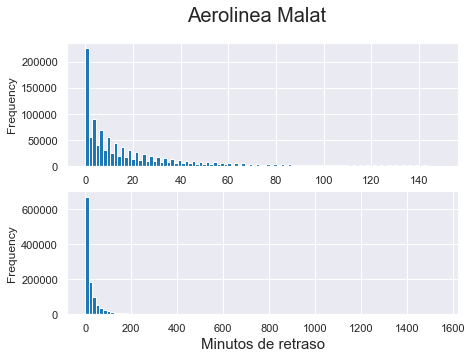

In [18]:
fig, ax = plt.subplots(2,1)
fig.suptitle("Aerolinea Malat", fontsize=20)
plt.xlabel("Minutos de retraso", fontsize=15)
malat[malat["Retraso de partida(en minutos)"]<150].plot(kind='hist',bins=100,figsize=(7,5),ax = ax[0],legend=False)
malat["Retraso de partida(en minutos)"].plot(kind='hist',bins=100,figsize=(7,5),ax = ax[1],legend=False)
plt.savefig("DataAerolineaMalat.png")

## Datos para la aerolinea ListoPlane

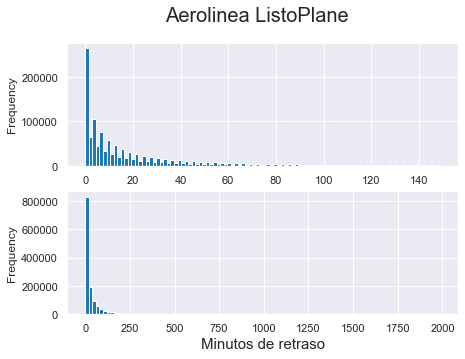

In [19]:
fig, ax = plt.subplots(2,1)
fig.suptitle("Aerolinea ListoPlane", fontsize=20)
plt.xlabel("Minutos de retraso", fontsize=15)
listoplane[listoplane["Retraso de partida(en minutos)"]<150].plot(kind='hist',bins=100,figsize=(7,5),ax = ax[0],legend=False)
listoplane["Retraso de partida(en minutos)"].plot(kind='hist',bins=100,figsize=(7,5),ax = ax[1],legend=False)
plt.savefig("DataListoPlane.png")

## Pasar a formato Pandas

In [20]:
# Datos de la aerolinea Malat
retraso_malat          = malat.groupby(["Retraso de partida(en minutos)"])["Retraso de partida(en minutos)"].count()
retraso_malat.sort_index(ascending=True, inplace=True)
ocurrencias_malat      = retraso_malat.values
minutos_malat          = retraso_malat.index.values.astype(int)
data_frame_malat       = {"Minutos de retrasos": minutos_malat, "Ocurrencia":ocurrencias_malat}
# Datos de la aerolinea ListoPlane
retraso_listoplane     = listoplane.groupby(["Retraso de partida(en minutos)"])["Retraso de partida(en minutos)"].count()
retraso_listoplane.sort_index(ascending=True, inplace=True)
ocurrencias_listoplane = retraso_listoplane.values
minutos_listoplane     = retraso_listoplane.index.values.astype(int)
data_frame_listoplane  = {"Minutos de retrasos": minutos_listoplane, "Ocurrencia":ocurrencias_listoplane}

In [21]:
# Datos en Pandas
aerolinea_malat        = pd.DataFrame(data = data_frame_malat)
aerolinea_listoplane   = pd.DataFrame(data = data_frame_listoplane)

In [22]:
# Tabla con los datos
aerolinea_malat

,Minutos de retrasos,Ocurrencia
0,0,151494
1,1,74068
2,2,55736
3,3,48144
4,4,42986
...,...,...
767,1376,1
768,1429,1
769,1433,1
770,1521,1


In [23]:
# Tabla con los datos
aerolinea_listoplane

,Minutos de retrasos,Ocurrencia
0,0,177866
1,1,86008
2,2,65672
3,3,56333
4,4,50092
...,...,...
1134,1631,1
1135,1649,1
1136,1670,1
1137,1878,1


# Modelo
Consideremos la función
$$R(t;\alpha,\beta,\gamma) = \alpha\exp\left(-\frac{t}{\beta}+\gamma\right),$$
donde $\alpha,\beta,\gamma$ son parámetros desconocidos. Se desea ajustar $R(t;\alpha,\beta,\gamma)$ al grafo asociado a los histogramas de los datos.

## Modelo y métodos

### Mínimos cuadrados y error absoluto

In [24]:
# Modelo
def y_modelo(x, alpha, beta, gamma):
    """
    -Input:
    -Output:
    -Descripcion:
    """
    output = alpha*np.exp(-x/beta + gamma)
    return output
# Metodos de estimacion
def minimos_cuadrados(theta, data):
    """
    -Input:
    -Output:
    -Descripcion:
    """
    # Parametros
    alpha = theta['alpha'].value
    beta  = theta['beta'].value
    gamma = theta['gamma'].value
    # Ecuacion
    model = np.array([y_modelo(x, alpha, beta, gamma) for x in range(len(data))])
    output = model - np.array(data['Ocurrencia'])
    return output
def error_abs(theta, data):
    """
    -Input:
    -Output:
    -Descripcion:
    """
    # Parametros
    alpha = theta['alpha'].value
    beta  = theta['beta'].value
    gamma = theta['gamma'].value
    # Ecuacion
    model = np.array([y_modelo(x, alpha,beta,gamma) for x in range(len(data))])
    output = np.sqrt(np.abs(model - np.array(data['Ocurrencia'])))
    return output

In [25]:
# Parametros alpha, beta, gamma con sus restricciones
theta = Parameters()
theta.add('alpha', value = 1, min=0)
theta.add('beta', value = 1, min=0, max=2)
theta.add('gamma', value = 1)

## Reportes de resultados


### Mínimos cuadrados
Para la aerolinea *Malat* tenemos la siguiente información:

In [27]:
report_malat = minimize(fcn = minimos_cuadrados, params = theta, method = "least_squares",  args=[aerolinea_malat])
report_malat

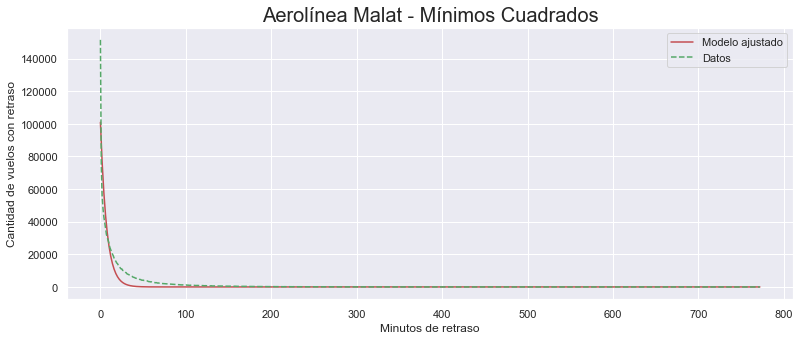

In [28]:
alpha = 5.48120048; beta = 7.19690774; gamma = 9.82144688
x = np.linspace(0, len(aerolinea_malat),len(aerolinea_malat))
plt.figure(figsize = (13,5))
plt.plot(x, y_modelo(x, alpha, beta, gamma), 'r')
plt.plot(x, aerolinea_malat["Ocurrencia"],'--g')
plt.legend(["Modelo ajustado","Datos"])
plt.title("Aerolínea Malat - Mínimos Cuadrados", fontsize=20)
plt.ylabel("Cantidad de vuelos con retraso")
plt.xlabel("Minutos de retraso")
plt.grid(True)
plt.savefig("AerolineaMalat-MinimosCuadrados.png")

Por otro lado, para la aerolínea *listoplane* tenemos:

In [29]:
report_listoplane = minimize(fcn = minimos_cuadrados, params = theta, method = "least_squares",  args=[aerolinea_listoplane])
report_listoplane

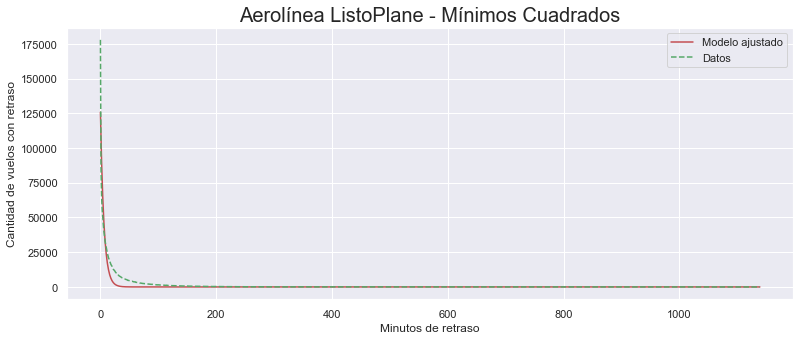

In [30]:
alpha = 16.5239762; beta = 6.01595611; gamma = 8.93750050 
x = np.linspace(0, len(aerolinea_listoplane),len(aerolinea_listoplane))
plt.figure(figsize = (13,5))
plt.plot(x, y_modelo(x, alpha, beta, gamma), 'r')
plt.plot(x, aerolinea_listoplane["Ocurrencia"],'--g')
plt.legend(["Modelo ajustado","Datos"])
plt.title("Aerolínea ListoPlane - Mínimos Cuadrados", fontsize=20)
plt.ylabel("Cantidad de vuelos con retraso")
plt.xlabel("Minutos de retraso")
plt.grid(True)
plt.savefig("AerolineaListoPlane-MinimosCuadrados.png")

### Error absoluto

In [31]:
report_malat      = minimize(fcn = error_abs, params = theta, method = "least_squares",  args=[aerolinea_malat])
report_malat

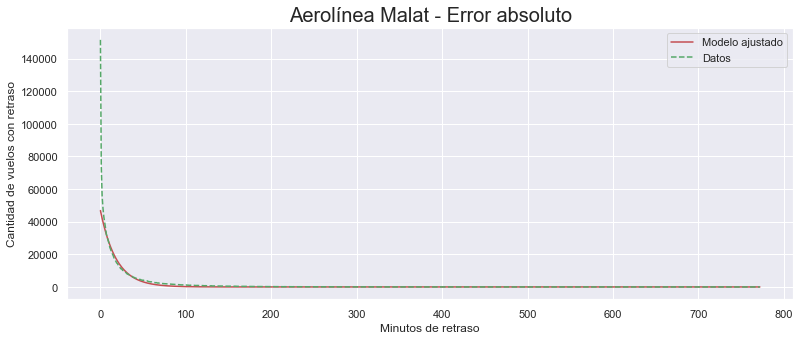

In [32]:
alpha = 2.21708659; beta = 18.4408982 ; gamma = 9.95820959 
x = np.linspace(0, len(aerolinea_malat),len(aerolinea_malat))
plt.figure(figsize = (13,5))
plt.plot(x, y_modelo(x, alpha, beta, gamma), 'r')
plt.plot(x, aerolinea_malat["Ocurrencia"],'--g')
plt.legend(["Modelo ajustado","Datos"])
plt.title("Aerolínea Malat - Error absoluto", fontsize=20)
plt.ylabel("Cantidad de vuelos con retraso")
plt.xlabel("Minutos de retraso")
plt.grid(True)
plt.savefig("AerolineaMalat-ErrorAbsoluto.png")

In [33]:
report_listoplane = minimize(fcn = error_abs, params = theta, method = "least_squares",  args=[aerolinea_listoplane])
report_listoplane

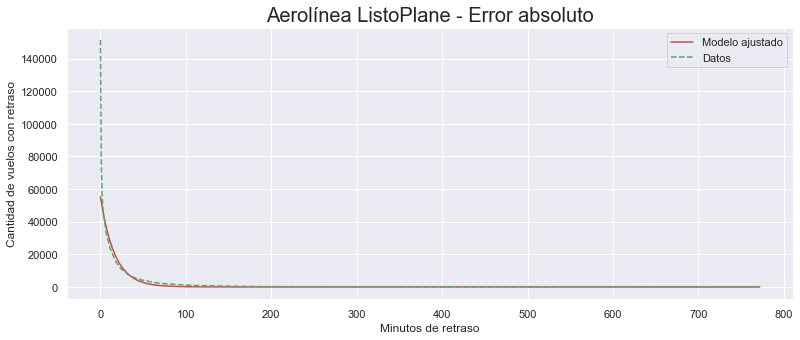

In [34]:
alpha = 35.1425698; beta = 16.6143950; gamma = 7.36068215
x = np.linspace(0, len(aerolinea_malat),len(aerolinea_malat))
plt.figure(figsize = (13,5))
plt.plot(x, y_modelo(x, alpha, beta, gamma), 'r')
plt.plot(x, aerolinea_malat["Ocurrencia"],'--g')
plt.legend(["Modelo ajustado","Datos"])
plt.title("Aerolínea ListoPlane - Error absoluto", fontsize=20)
plt.ylabel("Cantidad de vuelos con retraso")
plt.xlabel("Minutos de retraso")
plt.grid(True)
plt.savefig("AerolineaListoPlane-ErrorAbsoluto.png")

# Cálculos extras

## Pregunta 1

Para estimar cuantos vuelos con retraso hay entre 2 horas y 2 horas y media basta con calcular
\begin{equation*}
    v = \sum_{i=120}^{150} R(i;\alpha^{*},\beta^{*},\gamma^{*}),
\end{equation*}
ya obtenidos $\alpha^{*},\beta^{*},\gamma^{*}$ mediante el método de *mínimos cuadrados*. En efecto, las funciones ajustadas para cada aerolínea son:
\begin{eqnarray}
    R_{\text{Malat}}(t;\alpha^{*},\beta^{*},\gamma^{*}) &=& 5.4\exp\left(-\frac{t}{7.2} + 9.8\right)\\
    R_{\text{ListoPlane}}(t;\alpha^{*},\beta^{*},\gamma^{*}) &=& 16.5\exp\left(-\frac{t}{6.0} + 8.9\right)
\end{eqnarray}

In [39]:
v1,v2=0,0
for i in range(31):
    v1 += 5.4*np.exp(-(i+120)/7.2 + 9.8)
for i in range(31):
    v2 += 16.5*np.exp(-(i+120)/6.0 + 8.9)
print(v1,v2)

0.042803683424020564 0.0016149943310734534


## Pregunta 2
Nuevamente se busca estimar los vuelos con retraso, con el fin de ver si el método de minimiar el error absoluto presenta una diferencia en este resultado. Ya obtenidos $\alpha^{*},\beta^{*},\gamma^{*}$ mediante minimización del error absoluto, las funciones ajustadas para cada aerolínea son:
\begin{eqnarray}
    R_{\text{Malat}}(t;\alpha^{*},\beta^{*},\gamma^{*}) &=& 2.2\exp\left(-\frac{t}{18.4} + 9.4\right) \label{eq:Malat-ErrorAbs}\\
    R_{\text{ListoPlane}}(t;\alpha^{*},\beta^{*},\gamma^{*}) &=& 35.1\exp\left(-\frac{t}{16.6} + 7.4\right)\label{eq:ListoPlane-ErrorAbs}
\end{eqnarray}

In [40]:
v1,v2=0,0
for i in range(31):
    v1 += 2.2*np.exp(-(i+120)/18.4 + 9.4)
for i in range(31):
    v2 += 35.1*np.exp(-(i+120)/16.6 + 7.4)
print(v1,v2)

602.4216479202504 602.3349264852961


## Pregunta 3
Para $\alpha\geq0$ y $\gamma\in\mathbb{R}$ se busca $\beta_{0}$ tal que $R(t;\alpha,\beta,\gamma) = 0$ para $t\geq180$, como a menor $\beta$ luego el decaimiento es más veloz, luego se puede enunciar el siguiente problema de convergencia:
\begin{equation*}
    (\forall t\geq180)(\forall \varepsilon>0)(\exists\beta_{0}\leq0)(\forall \beta\leq\beta_{0}): \left| R(t;\alpha,\beta,\gamma) - 0\right|<\varepsilon.
\end{equation*}

Se propone $\beta_{0} = 2$. Con ello se estudia el problema de optimización de mínimos cuadrados:
\begin{eqnarray*}
    &\min       &   f(\alpha,\beta,\gamma)=\sum_{i=1}^{N}(R(t) - R(t;\alpha,\beta,\gamma)^{2}\\
    &\text{s.a.}&   \alpha\geq0\\
    &           &   0\leq\beta\leq2\\
    &           &   \gamma\in\mathbb{R},
\end{eqnarray*}

A continuación se codifican las sumas con los coeficientes obtenidos en este nuevo problema

In [43]:
# Minimos cuadrados
v1,v2=0,0
for i in range(31):
    v1 += 4.0*np.exp(-(i+120)/2.0 + 10.5)
for i in range(31):
    v2 += 5.1*np.exp(-(i+120)/2.0 + 10.5)
print(v1,v2)

3.2327502903949108e-21 4.121756620253511e-21


In [44]:
# Error absoluto
v1,v2=0,0
for i in range(31):
    v1 += 3.5*np.exp(-(i+120)/2.0 + 10.7)
for i in range(31):
    v2 += 2.9*np.exp(-(i+120)/2.0 + 11.0)
print(v1,v2)

3.4549288559900136e-21 3.864180520811176e-21
